In [2]:
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

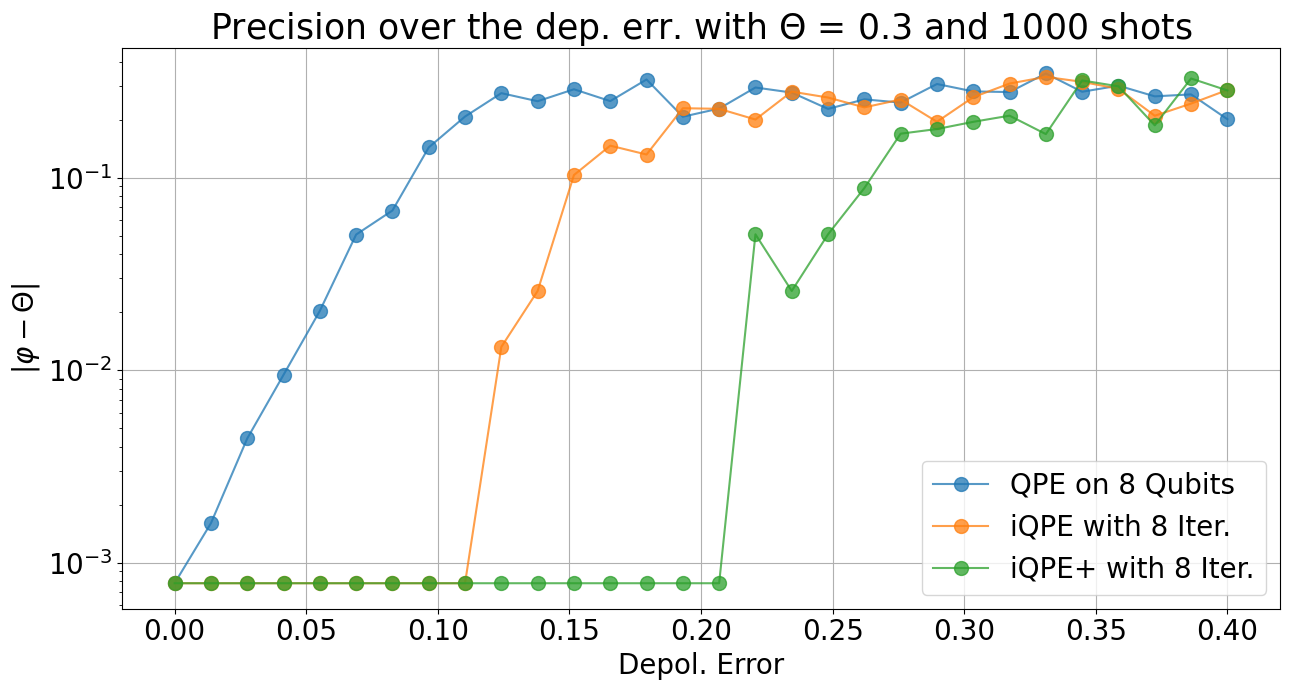

In [3]:
iQPE_plus = np.loadtxt("txt/iQPE+_error_threshhold.txt", delimiter=",")
iQPE = np.loadtxt("txt/iQPE_error_threshhold.txt", delimiter=",")
QPE = np.loadtxt("txt/QPE_error_threshhold.txt", delimiter=",")

angle = 0.3
n = 8
shots = 1000

fig, ax = plt.subplots(figsize=(13,7))
ax = plt.plot(QPE[0,:],QPE[1,:], marker = ".", label="QPE on 8 Qubits", markersize = 20, alpha=0.75)
ax = plt.plot(iQPE[0,:],iQPE[1,:], marker = ".", label="iQPE with 8 Iter.", markersize = 20, alpha=0.75)
ax = plt.plot(iQPE_plus[0,:],iQPE_plus[1,:], marker = ".", label="iQPE+ with 8 Iter.", markersize = 20, alpha=0.75)
plt.title("Precision over the dep. err. with "+r"$\Theta$"+" = {} and {} shots".format(angle, int(shots)), fontsize = 25)
plt.yscale("log")
plt.ylabel(r"$\vert \varphi - \Theta \vert$",fontsize=20)
plt.xlabel("Depol. Error", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
#plt.rcParams.update({'font.size': 10})
plt.legend(fontsize=20, loc="lower right")
plt.grid()
plt.tight_layout()
#plt.savefig("Error_Threshhold.png", dpi = 300)

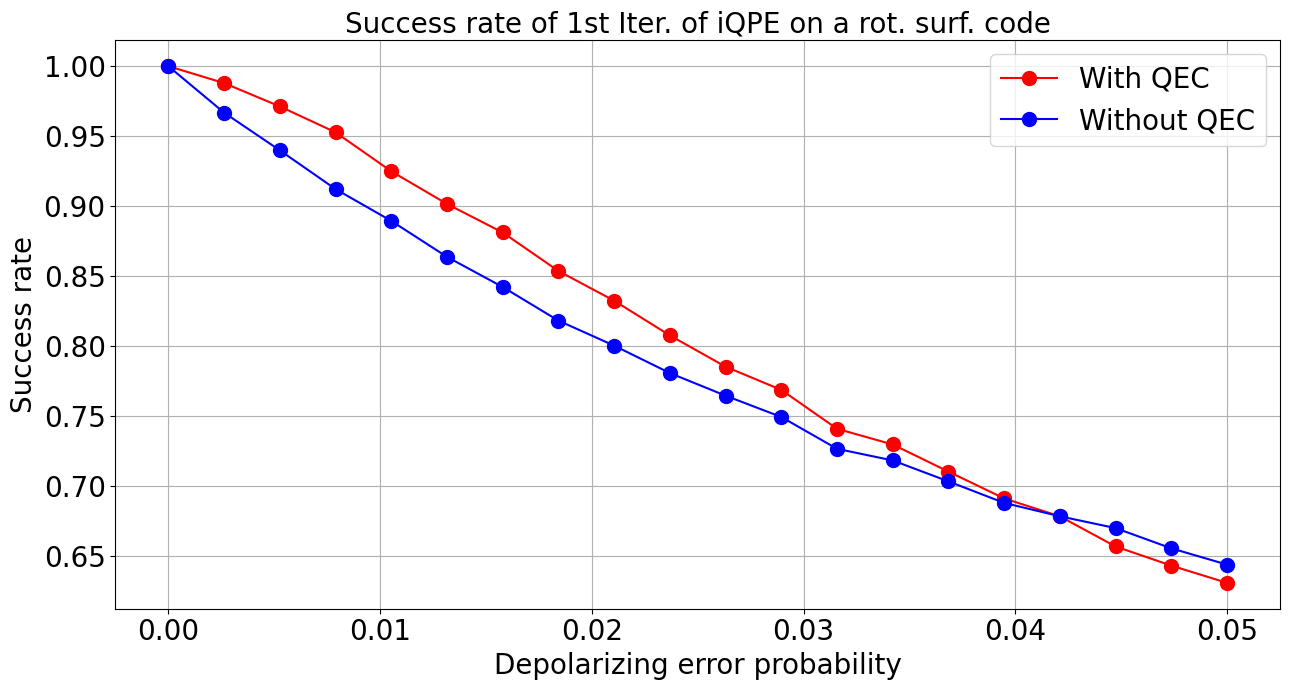

In [4]:
QEC = np.loadtxt("txt/QEC.txt", delimiter=",")

x = QEC[0,:]
y = QEC[1,:]
y_no_QEC = QEC[2,:]

fig, ax = plt.subplots(figsize=(13,7))
ax.plot(x,y,label = "With QEC", color="red", marker = ".", markersize = 20)
ax.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20)
plt.title("Success rate of 1st Iter. of iQPE on a rot. surf. code", fontsize=20)
plt.xlabel("Depolarizing error probability", fontsize=20)
plt.ylabel("Success rate", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
#plt.savefig("iQPE_1st.png", dpi = 300)

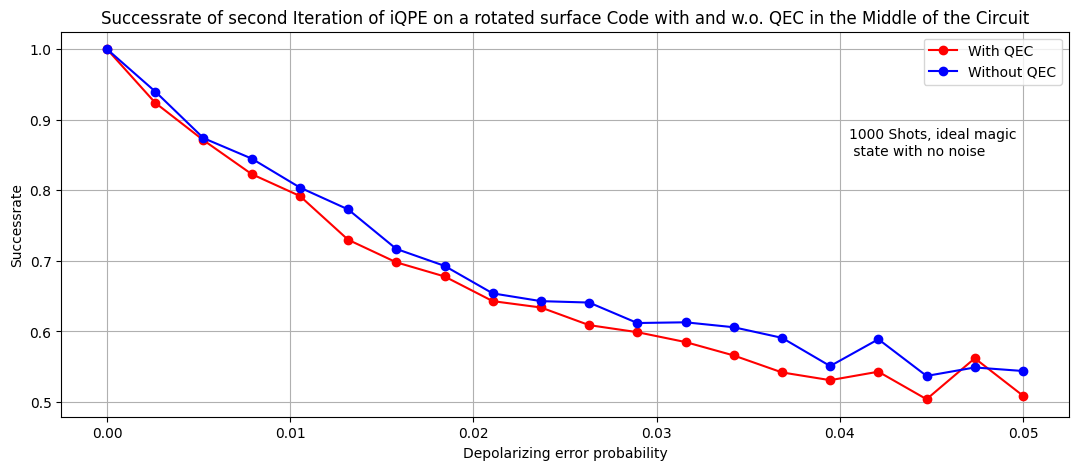

In [5]:
data = np.loadtxt("txt/iQPE_2nd_step_1000shots.txt", delimiter=",")

x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]

fig, ax = plt.subplots(figsize=(13,5))

ax.plot(x,y,label = "With QEC", color="red", marker = "o")
ax.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = "o")
plt.title("Successrate of second Iteration of iQPE on a rotated surface Code with and w.o. QEC in the Middle of the Circuit")
plt.xlabel("Depolarizing error probability")
plt.text(0.0405,0.85,"1000 Shots, ideal magic \n state with no noise")
plt.ylabel("Successrate")
plt.grid()
plt.legend()
plt.show()

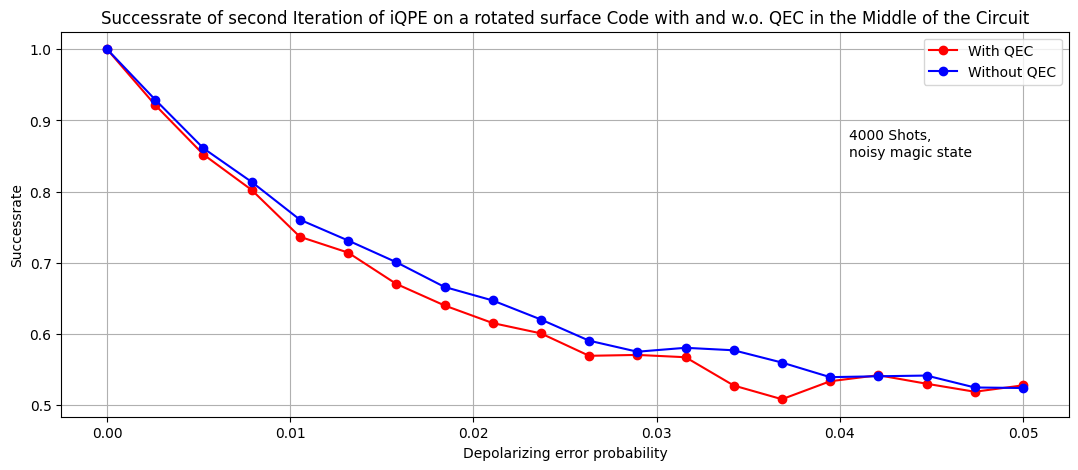

In [4]:
data = np.loadtxt("txt/iQPE_2nd_step_4000shots_noisy_magic_states.txt", delimiter=",")

x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]

fig, ax = plt.subplots(figsize=(13,5))

ax.plot(x,y,label = "With QEC", color="red", marker = "o")
ax.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = "o")
plt.title("Successrate of second Iteration of iQPE on a rotated surface Code with and w.o. QEC in the Middle of the Circuit")
plt.xlabel("Depolarizing error probability")
plt.ylabel("Successrate")
plt.text(0.0405,0.85,"4000 Shots,\nnoisy magic state")
plt.grid()
plt.legend()
plt.show()

In [10]:
def mean(x: list, y: list):                 #bildet den Mittelwert unter den Shots einer Messung
    m = 0
    total = 0
    for i in range(len(x)):
        m += x[i]*y[i]
        total += y[i]
    m = m*(1/total)
    return m

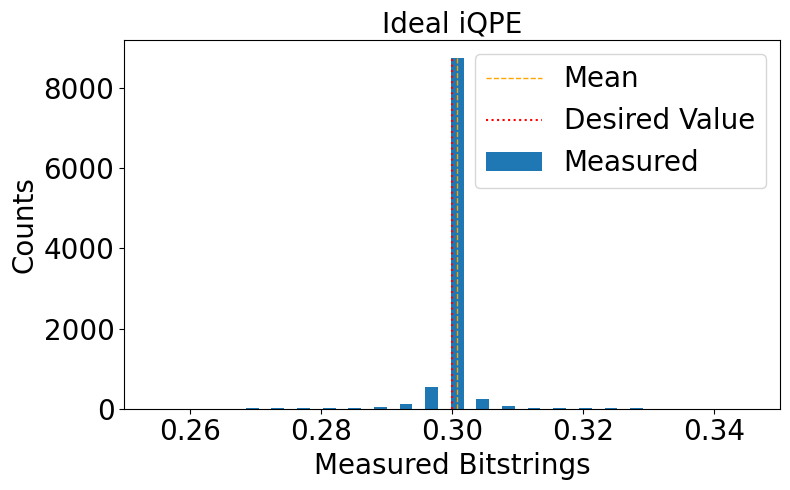

In [52]:
data = np.loadtxt("txt/iQPE_measurement.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8-1), label="Measured")
plt.vlines(avg, 0 , max(y), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted", label = "Desired Value")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Ideal iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstrings", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xlim(0.25,0.35)

plt.legend(fontsize=20)
plt.tight_layout()

plt.savefig("Nice.png", dpi = 300)

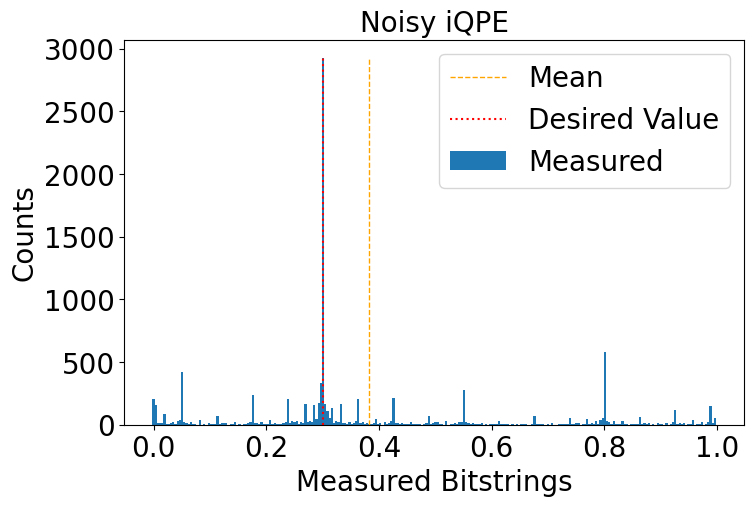

In [44]:
data = np.loadtxt("txt/noisy_iQPE_0_05.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8), label="Measured")
plt.vlines(avg, 0 , max(y), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted", label = "Desired Value")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Noisy iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstrings", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

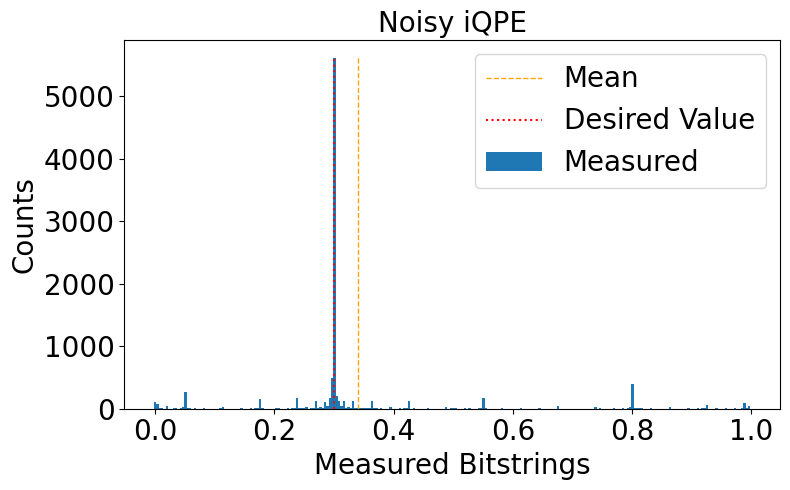

In [55]:
data = np.loadtxt("txt/noisy_iQPE_0_02.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8), label="Measured")
plt.vlines(avg, 0 , max(y), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted", label = "Desired Value")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Noisy iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstrings", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()
#plt.savefig("iQPE_0_02.png", dpi = 300)

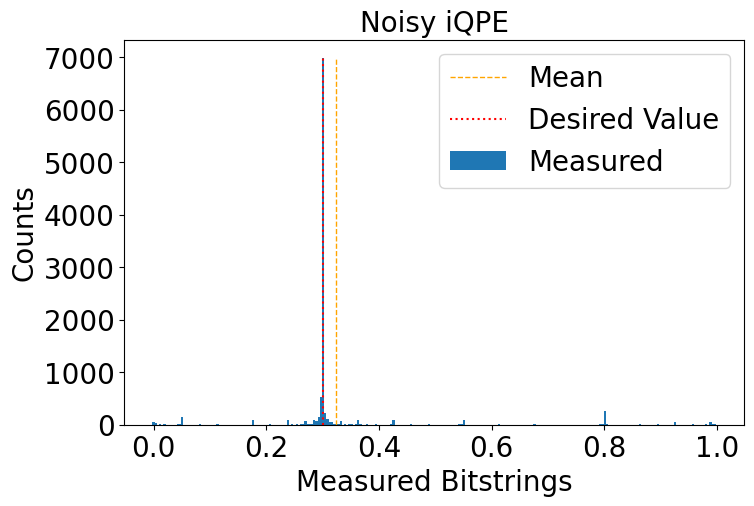

In [46]:
data = np.loadtxt("txt/noisy_iQPE_0_01.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8), label="Measured")
plt.vlines(avg, 0 , max(y), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted", label = "Desired Value")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Noisy iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstrings", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.legend(fontsize=20)